# Exploração de conceitos: ACI

Neste caderno vamos realizar os testes pra criação da Prova de Conceito (PoC) do produto ACI (Automated Component Analysis), que consiste em uma montagem simples com uma câmera que irá obter imagens, e passará para o software que será criado à partir deste caderno, que irá realizar os seguintes testes:

1. Verificação da cor de alguns componentes;
2. Verificação do ativamento dos LEDs;
3. Verificação do texto em um componente.

Para esse protótipo é assumido o seguinte:

- A placa sempre será colocada na mesma posição
- A placa sempre estará sob as mesmas condições de iluminação

O algorítmo geral é o seguinte:

1. Ao receber sinal de placa posicionada uma imagem será tomada e carregada;
2. A imagem será segmentada com base em um mapa de retângulos criado manualmente a priori;
3. Para cada segmento será aplicado um teste adequado que retornará verdadeiro se o teste passou e falso caso contrário;
4. Os valores retornados serão usados para exibir os resultados do teste.

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Além dos pacotes usuais, será usado o OpenCV (cv2) que permite acessar a câmera para tirar imagens, e fornece funções úteis para o processamento de imagens.

# Carregamento da imagem

Aqui serão carregas as imagens diretamente sem o uso da câmera. O código que ativa a câmera está na pasta "../test".

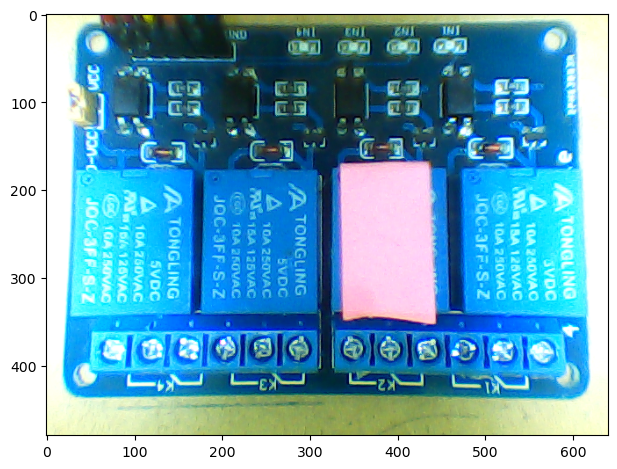

In [2]:
# Por padrão o cv2 carrega as imagens no esquema BGR, aqui estamos carregando a imagem
# e transformando para RGB, para poder plotar direto.

image = cv2.cvtColor(cv2.imread("t_led_off.png"), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.tight_layout()
plt.show()

## Mapa de segmentação

A ideia é que o produto funcione com base em um mapa de segmentação, que irá cortar a imagem em vários quadrados e aplicar os testes em cada quadrado. Vamos testar a ideia ...

relay1


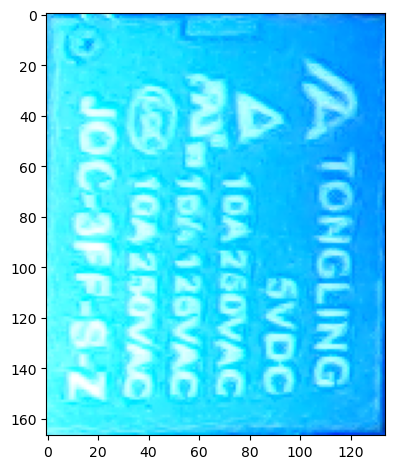

relay2


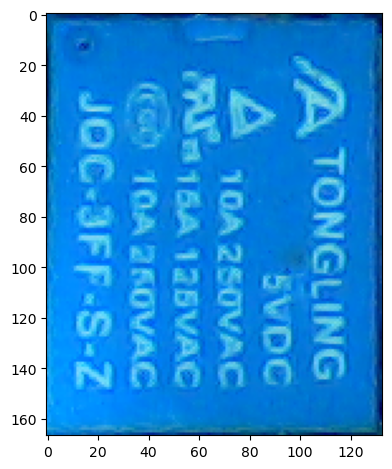

relay3


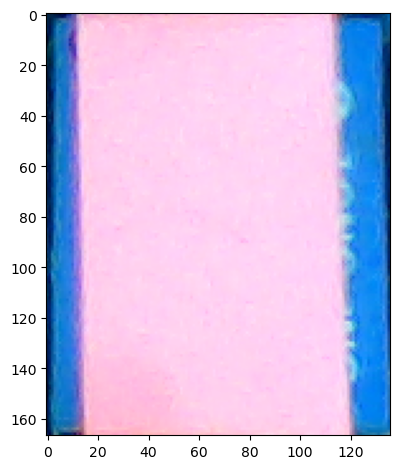

relay4


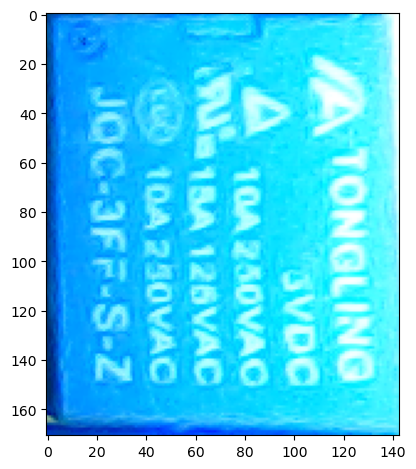

LED1


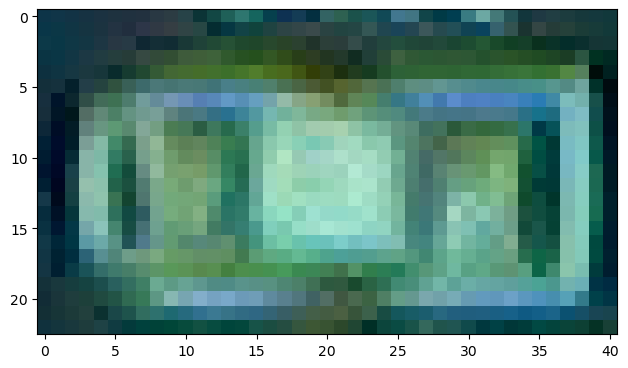

LED2


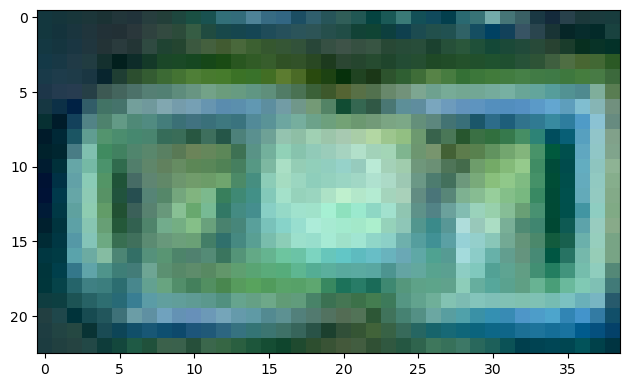

LED3


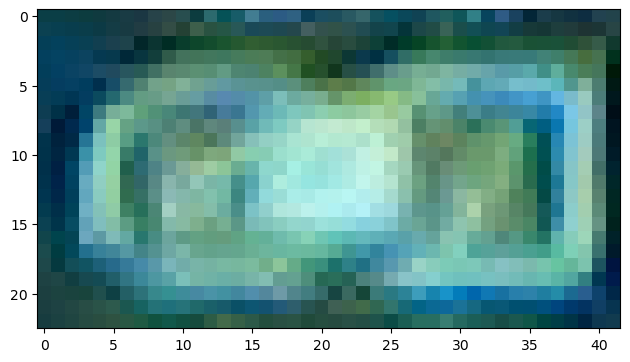

LED4


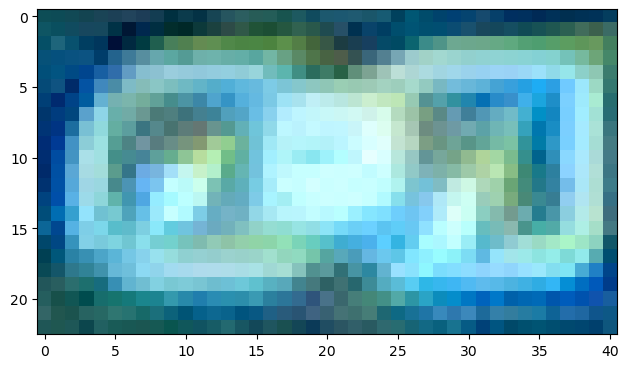

texto1


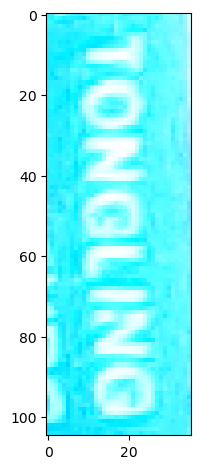

In [6]:
# Mapa criado manualmente coletando as vértices dos retângulos

mapa = {
    "relay1": image[177:344, 32:166, :],
    "relay2": image[176:343, 178:311, :],
    "relay3": image[174:341, 323:459, :],
    "relay4": image[176:347, 471:614, :],
    "LED1": image[26:49, 273:314, :],
    "LED2": image[26:49, 330:369, :],
    "LED3": image[26:49, 385:427, :],
    "LED4": image[26:49, 439:480, :],
    "texto1": image[225:330, 577:613, :]
}

# Printanto para verificar resultado
for component in mapa:
    print(component)
    plt.imshow(mapa[component])
    plt.tight_layout()
    plt.show()

In [41]:
# Segmenter function

def segment(image):
    """
    Given RGB image, loaded as a 3D numpy array. Return
    segments based on map.
    """

    segments = {
        "relay1": image[177:344, 32:166, :],
        "relay2": image[176:343, 178:311, :],
        "relay3": image[174:341, 323:459, :],
        "relay4": image[176:347, 471:614, :],
        "LED1": image[26:49, 273:314, :],
        "LED2": image[26:49, 330:369, :],
        "LED3": image[26:49, 385:427, :],
        "LED4": image[26:49, 439:480, :],
        "texto1": image[225:330, 577:613, :]
    }
    
    return segments

relay1


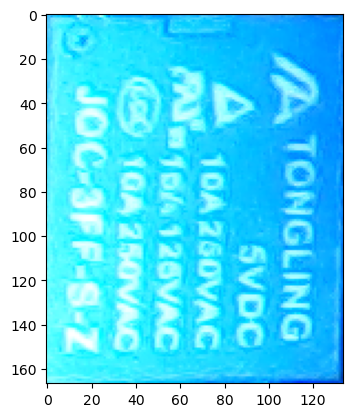

relay2


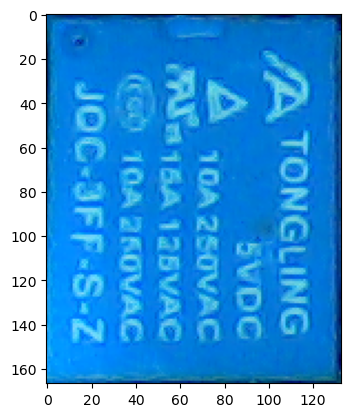

relay3


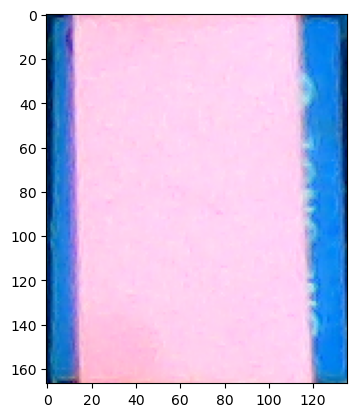

relay4


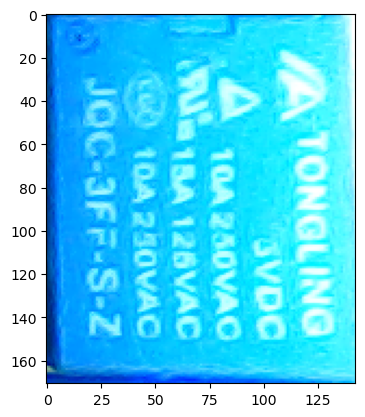

LED1


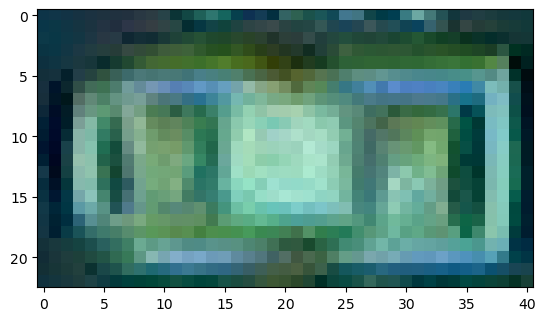

LED2


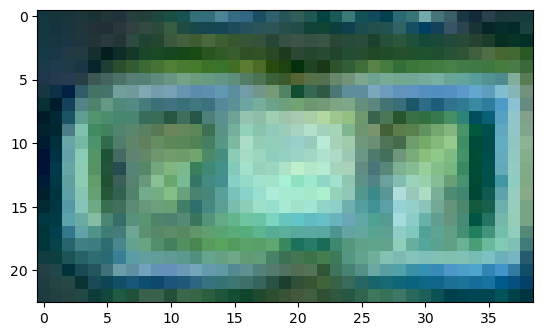

LED3


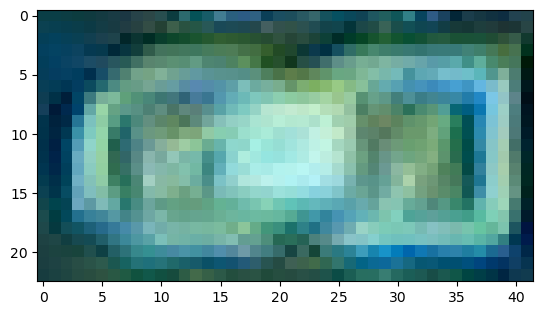

LED4


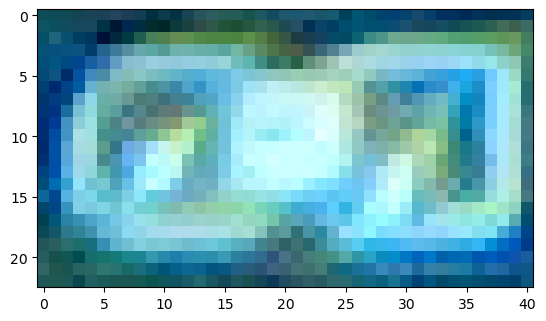

texto1


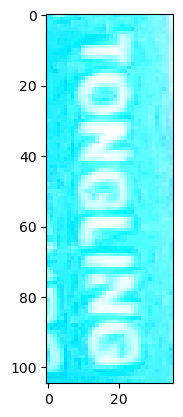

In [42]:
## Checking

map_test = segment(image)

for component in map_test:
    print(component)
    plt.imshow(mapa[component])
    plt.show()

# Testes para os segmentos

Vamos explorar os conceitos para cada tipo de teste.

## Achando cor predominante

Para o teste de cor é necessário achar uma forma de captar a cor predominante.

In [14]:
componente1 = mapa["relay1"]
componente2 = mapa["relay3"]

In [13]:
# Pegando a cor mediana e arredondando
c1 = np.rint(np.median(np.median(componente1, axis=0), axis=0))
c2 = np.rint(np.median(np.median(componente2, axis=0), axis=0))

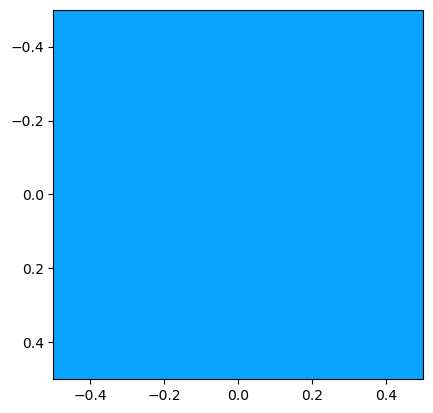

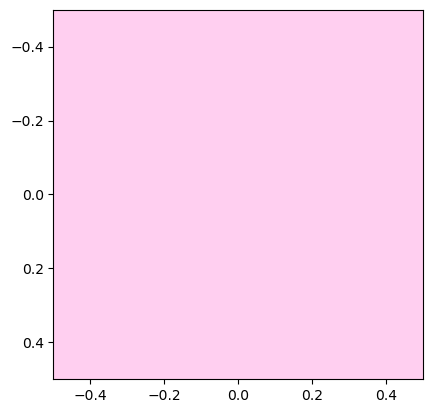

In [15]:
plt.imshow([[(10, 163, 255)]])
plt.show()
plt.imshow([[(255, 207 ,  240)]])
plt.show()

Achado um método !

## Testando tesseract

Para o reconhecimento de texto (ou Optical Caracter Recognition - OCR) será usado o tesseract, que deve ser instalado na máquina e rodado no python usando um wrapper, o pytesseract.

In [19]:
import pytesseract

### Testes simples

Primeiramente vamos testar com casos muito simples usando imagens geradas com o gimp.

(500, 600, 3)


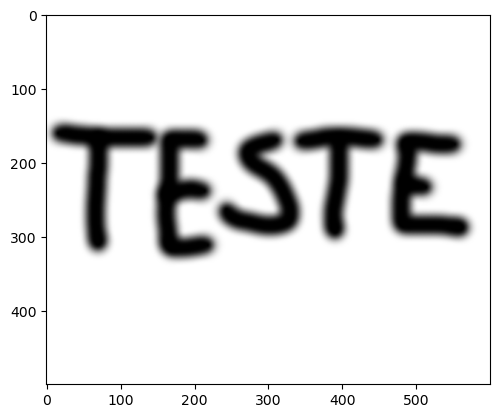

'TESTE\n\x0c'

In [29]:
testing = cv2.cvtColor(cv2.imread("test.png"), cv2.COLOR_BGR2RGB)

print(testing.shape)
plt.imshow(testing)
plt.show()
pytesseract.image_to_string(testing, lang="por")

Com um texto grande o reconhecimento funciona sem nenhum processamento prévio.

(30, 100, 3)


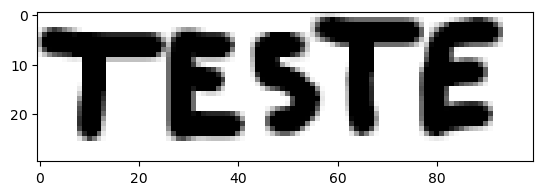

'TESTE\n\x0c'

In [31]:
testing2 = cv2.cvtColor(cv2.imread("teste2.png"), cv2.COLOR_BGR2RGB)
print(testing2.shape)

#testing2 = get_grayscale(testing2)
#t2 = thresholding(testing2)
plt.imshow(testing2)
plt.show()
pytesseract.image_to_string(t2, lang="por",config='--psm 7')

Com um texto menor foi necessário usar a opção --psm 7 para que o reconhecimento funcionasse. No entanto ñ sei qual parâmetro é esse até então.

(30, 100)


'TESTE\n\x0c'

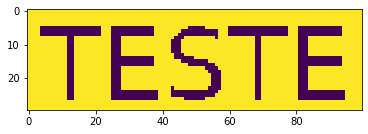

In [297]:
testing3 = cv2.cvtColor(cv2.imread("teste3.png"), cv2.COLOR_BGR2RGB)
print(testing2.shape)

testing3 = get_grayscale(testing3)
t2 = thresholding(testing3)
plt.imshow(t2)
pytesseract.image_to_string(t2, lang="por", config='--psm 7')

Outro teste simples, foi necessário novamente mudar o parametro --psm.

 Abaixo estão várias opções de processamento para tentar melhorar a possibilidade de reconhecimento.

In [16]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# this here is interesting ... but i have not tested it ...
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 


In [32]:
gray = get_grayscale(mapa["texto1"])
thresh = thresholding(gray)
op = opening(gray)
cann = canny(gray)

TONGLING



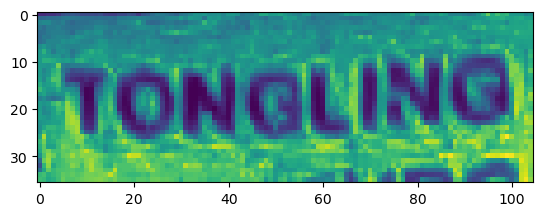

In [37]:
test = mapa["texto1"].copy()

# Fixing the orientation and getting grayscale
g = np.flip(get_grayscale(mapa["texto1"].copy()).transpose(), axis=0)

# Inverting colors
g = np.invert(g)
print(pytesseract.image_to_string(g, config='--psm 7'))
plt.imshow(g)
plt.show()

Sucesso em ler o texto alvo! No entanto foram necessários mais 3 passos:

- Consertar orientação;
- Colocar texto em escala de preto e branco;
- E inverter as cores para ficar com letras pretas no fundo claro.

Todos são coisas que o tesseract precisa para ler textos mais difíceis.

## Teste  de LED

Teste de LED será bem simples, olhando apenas a media das contagens em duas imagens.

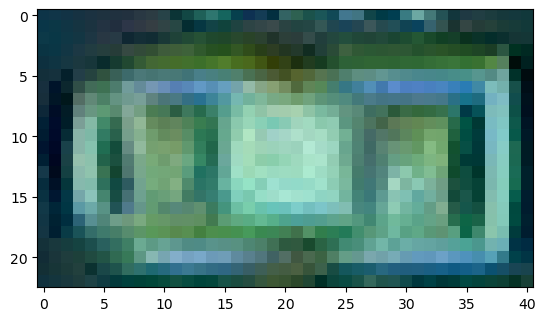

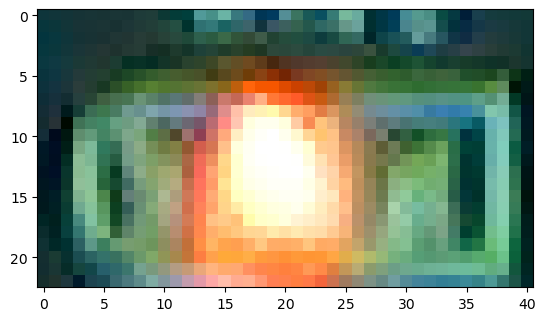

In [46]:
im_led_off = cv2.cvtColor(cv2.imread("t_led_off.png"), cv2.COLOR_BGR2RGB)
im_led_on = cv2.cvtColor(cv2.imread("t_led_on.png"), cv2.COLOR_BGR2RGB)

led_off = segment(im_led_off)["LED1"]
led_on = segment(im_led_on)["LED1"]

plt.imshow(led_off)
plt.show()
plt.imshow(led_on)
plt.show()

In [340]:
on = get_grayscale(led_on)
off = get_grayscale(led_off)

print(np.max(on), np.max(off))

print(np.max(off)*0.05 + np.max(off))

test_value = np.max(off)*0.05 + np.max(off)

np.max(on) > test_value

255 214
224.7


True

Metodologia ok! usando limite de 5% acima do brilho da imagem anterior como critério.

# Estruturando testes em funções 

Agora que os conceitos foram explorados vamos organizar as idéias em funções.

## Teste de LED 

In [44]:
# LED test

def test_led(led_off, led_on, tolerance = 0.05):
    """
    Given RGB image segments, perform test to see if 
    max value has increased significantly (above 5%
    by default)
    """
    on = get_grayscale(led_on)
    off = get_grayscale(led_off)

    test_value = np.max(off)*tolerance + np.max(off)

    return np.max(on) > test_value


In [354]:
test_led(led_off, led_on)

True

In [45]:
test_led(led_off, led_off)

False

OK!!

## Teste de cor

In [362]:
## Testing ideas

##
ref = 10
check = 9.5
tolerance = 0.05

ref - ref*tolerance <= check <= ref + ref*tolerance

## 

all([True, True, True])

True

In [363]:
def test_color(im, ref_RGB, tolerance = 0.1):
    """
    Given a reference RGB value and a segment 
    image see if colors areo f the same within 
    a confidence interval (default is 10%).
    """
    
    colors = np.rint(np.median(np.median(im, axis=0), axis=0))
    
    positives = []
    for ref, check in zip(ref_RGB, colors):
        positives.append(
             ref - ref*tolerance <= check <= ref + ref*tolerance
        )
    
    return all(positives)

In [367]:
# Verifying ...

print(test_color(map_test["relay3"], (255, 207 ,  240)))
print(test_color(map_test["relay1"], (255, 207 ,  240)))

True
False


OK !!!

In [374]:
def test_text(im, ref_text):
    """
    Given a reference text value and a segment 
    image see if text is the same based on
    OCR technology.
    """ 
    corrected = np.flip(get_grayscale(im).transpose(), axis=0)
    inverted = np.invert(corrected)  # Tesseract needs black on white
    
    recovered = pytesseract.image_to_string(inverted, config='--psm 7')
    
    
    # Default to upper case and clean ends
    rec = recovered.upper().strip()
    ref = ref_text.upper().strip()
    
    return ref == rec

In [377]:
test_text(map_test["texto1"], "TOnGLING \n")

True

Todos os testes funcionando !